In [ ]:
!pip install wbgapi

# Data loading and exploring

In [ ]:
import wbgapi as wb
import pandas as pd

indicators = {
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth',
    'FP.CPI.TOTL.ZG': 'inflation',
    'SL.UEM.TOTL.ZS': 'unemployment',
    'FR.INR.LEND': 'lending_rate',
    'NE.RSB.GNFS.ZS': 'trade_balance',
    'GC.XPN.TOTL.GD.ZS': 'gov_expenditure',
    'BX.KLT.DINV.WD.GD.ZS': 'fdi_net',
    'SP.POP.GROW': 'pop_growth'
}


df = wb.data.DataFrame(indicators, 'PAK', time=range(2000, 2025))
print(df.info())
print(df.head(7))

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BX.KLT.DINV.WD.GD.ZS to SP.POP.GROW
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR2000  6 non-null      float64
 1   YR2001  5 non-null      float64
 2   YR2002  5 non-null      float64
 3   YR2003  5 non-null      float64
 4   YR2004  6 non-null      float64
 5   YR2005  6 non-null      float64
 6   YR2006  6 non-null      float64
 7   YR2007  6 non-null      float64
 8   YR2008  6 non-null      float64
 9   YR2009  6 non-null      float64
 10  YR2010  7 non-null      float64
 11  YR2011  7 non-null      float64
 12  YR2012  7 non-null      float64
 13  YR2013  7 non-null      float64
 14  YR2014  7 non-null      float64
 15  YR2015  7 non-null      float64
 16  YR2016  7 non-null      float64
 17  YR2017  7 non-null      float64
 18  YR2018  7 non-null      float64
 19  YR2019  7 non-null      float64
 20  YR2020  7 non-null      float64
 21  YR2021  7 non-null 

In [ ]:
t_df=df.transpose()
t_df.rename(columns={
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth',
    'FP.CPI.TOTL.ZG': 'inflation',
    'SL.UEM.TOTL.ZS': 'unemployment',
    'FR.INR.LEND': 'lending_rate',
    'NE.RSB.GNFS.ZS': 'trade_balance',
    'GC.XPN.TOTL.GD.ZS': 'gov_expenditure',
    'BX.KLT.DINV.WD.GD.ZS': 'fdi_net',
    'SP.POP.GROW': 'pop_growth'
}, inplace=True)
print(t_df.info())
print(t_df.head(25))

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, YR2000 to YR2024
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fdi_net          25 non-null     float64
 1   inflation        15 non-null     float64
 2   lending_rate     18 non-null     float64
 3   gov_expenditure  1 non-null      float64
 4   trade_balance    25 non-null     float64
 5   gdp_growth       25 non-null     float64
 6   unemployment     25 non-null     float64
 7   pop_growth       25 non-null     float64
dtypes: float64(8)
memory usage: 2.3+ KB
None
series   fdi_net  inflation  lending_rate  gov_expenditure  trade_balance  \
YR2000  0.309595        NaN           NaN          12.7761      -2.200712   
YR2001  0.389107        NaN           NaN              NaN      -2.324863   
YR2002  0.843517        NaN           NaN              NaN      -0.603082   
YR2003  0.475208        NaN           NaN              NaN      -0.320871   
YR2

# Data Cleaning

In [ ]:
#Remove years with incomplete target variable 'gdp_growth' (if any)
t_df = t_df.dropna(subset=['gdp_growth'])

#Remove feature column 'gov_expenditure' as it doesnt have any data
t_df=t_df.drop('gov_expenditure',axis=1)

print(t_df.head(25))

series   fdi_net  inflation  lending_rate  trade_balance  gdp_growth  \
YR2000  0.309595        NaN           NaN      -2.200712    4.260088   
YR2001  0.389107        NaN           NaN      -2.324863    3.651350   
YR2002  0.843517        NaN           NaN      -0.603082    2.594817   
YR2003  0.475208        NaN           NaN      -0.320871    5.401311   
YR2004  0.845586        NaN      7.257500      -1.962394    7.831256   
YR2005  1.515751        NaN      9.071667      -5.374811    7.276574   
YR2006  2.639750        NaN     10.987500      -7.951826    6.051638   
YR2007  3.035719        NaN     11.768333      -7.537728    4.444814   
YR2008  2.689367        NaN     12.935833     -10.597330    2.120441   
YR2009  1.248013        NaN     14.537500      -8.544911    3.472551   
YR2010  1.027911  12.938871     14.042500      -6.714553    1.501718   
YR2011  0.575055  11.916093     14.419167      -5.397529    2.680117   
YR2012  0.343453   9.682352     13.519167      -7.571045    3.02

In [ ]:
# Replacing NaN values with mean
t_df.fillna(t_df.mean(), inplace=True)
print(t_df.head(25))

series   fdi_net  inflation  lending_rate  trade_balance  gdp_growth  \
YR2000  0.309595  10.531055     11.086858      -2.200712    4.260088   
YR2001  0.389107  10.531055     11.086858      -2.324863    3.651350   
YR2002  0.843517  10.531055     11.086858      -0.603082    2.594817   
YR2003  0.475208  10.531055     11.086858      -0.320871    5.401311   
YR2004  0.845586  10.531055      7.257500      -1.962394    7.831256   
YR2005  1.515751  10.531055      9.071667      -5.374811    7.276574   
YR2006  2.639750  10.531055     10.987500      -7.951826    6.051638   
YR2007  3.035719  10.531055     11.768333      -7.537728    4.444814   
YR2008  2.689367  10.531055     12.935833     -10.597330    2.120441   
YR2009  1.248013  10.531055     14.537500      -8.544911    3.472551   
YR2010  1.027911  12.938871     14.042500      -6.714553    1.501718   
YR2011  0.575055  11.916093     14.419167      -5.397529    2.680117   
YR2012  0.343453   9.682352     13.519167      -7.571045    3.02

# Exploratory Data Analysis (EDA)

In [ ]:
t_df.describe()

series,fdi_net,inflation,lending_rate,trade_balance,gdp_growth,unemployment,pop_growth
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,0.938997,10.531055,11.086858,-6.704372,3.995366,2.49460,2.048509
std,0.750938,5.445534,1.935411,3.108778,2.162462,2.13625,0.497221
min,0.309595,2.529328,7.257500,-11.950173,-1.274087,0.39800,1.302164
25%,0.515354,9.496211,10.155833,-8.544911,2.680117,0.62900,1.623715
50%,0.695308,10.531055,11.086858,-7.228145,4.217942,1.82700,1.906200
75%,0.845586,10.531055,11.985833,-5.397529,5.401311,4.08300,2.468091
max,3.035719,30.768128,14.537500,-0.320871,7.831256,6.33800,2.824760


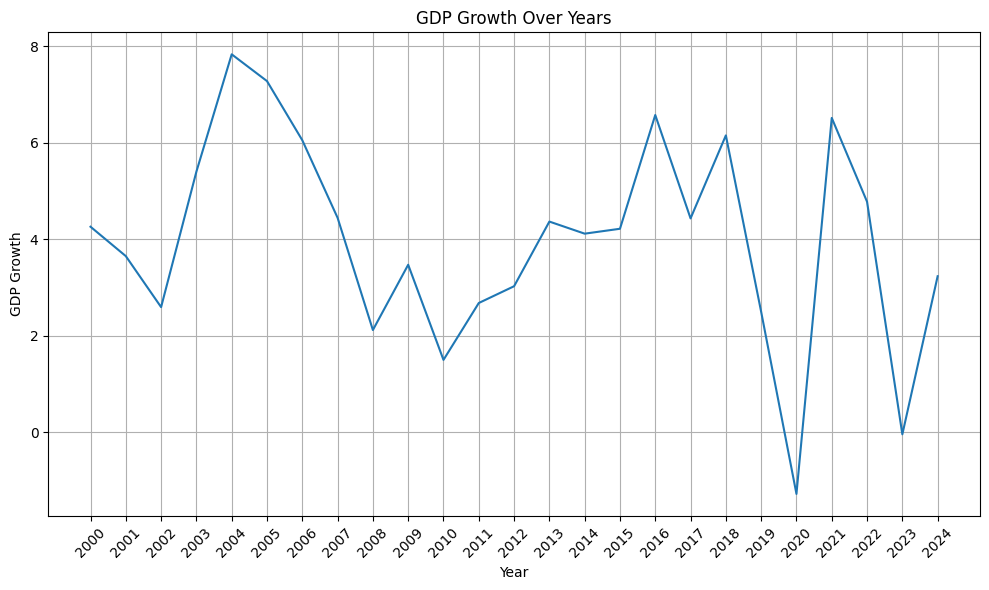

In [ ]:
#Time series plot for gdp growth

import matplotlib.pyplot as plt

x_axis_data = [int(year.replace('YR', '')) for year in t_df.index]
y_axis_data = t_df['gdp_growth']

plt.figure(figsize=(10, 6))
plt.plot(x_axis_data, y_axis_data)
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP Growth Over Years')
plt.grid(True)
plt.xticks(x_axis_data, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
gdp_corr = t_df.corr()['gdp_growth'].sort_values(ascending=False)
print("Correlations with gdp_growth:\n", gdp_corr)

Correlations with gdp_growth:
 series
gdp_growth       1.000000
trade_balance    0.144421
fdi_net          0.081935
pop_growth       0.041294
unemployment    -0.259369
inflation       -0.413003
lending_rate    -0.589712
Name: gdp_growth, dtype: float64


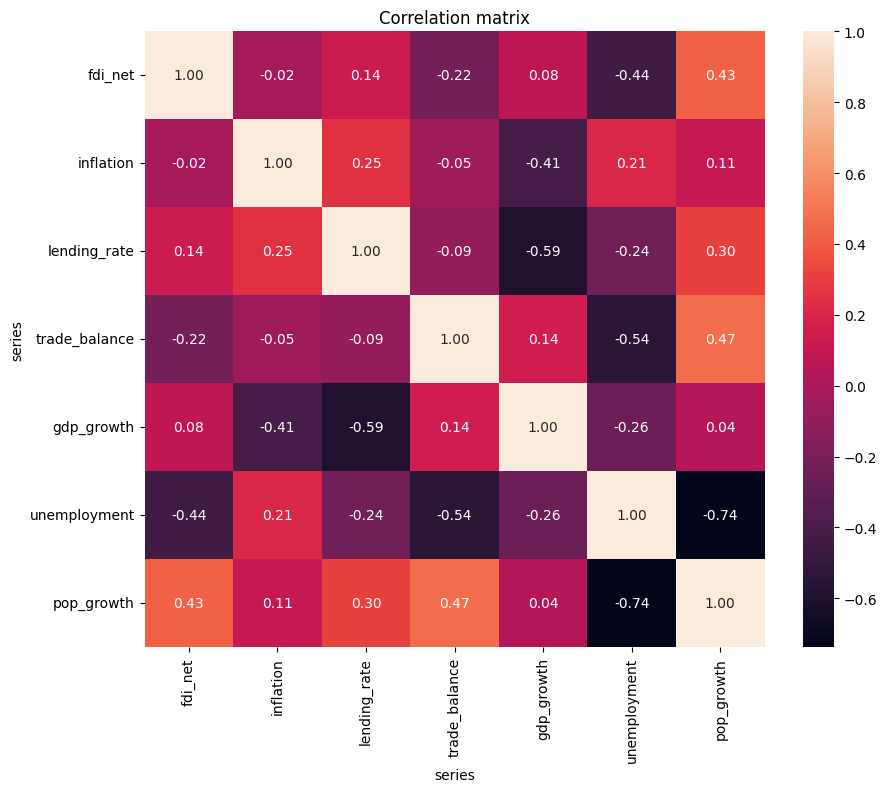

In [ ]:
# Correlation heatmap

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(t_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()


### Top Correlated Indicators with 'gdp_growth'

From the correlation analysis, the indicators most strongly correlated with 'gdp_growth' are:

*   **lending_rate**: -0.589712 (Strong negative correlation)
*   **inflation**: -0.413003 (Moderate negative correlation)
*   **unemployment**: -0.259369 (Weak negative correlation)
*   **trade_balance**: 0.144421 (Very weak positive correlation)
*   **fdi_net**: 0.081935 (Very weak positive correlation)
*   **pop_growth**: 0.041294 (Very weak positive correlation)

**Interpretation:**

*   `lending_rate` and `inflation` show the strongest relationships with `gdp_growth`, both exhibiting negative correlations. This suggests that as lending rates and inflation increase, GDP growth tends to decrease.
*   `unemployment` also has a negative correlation, though weaker, implying higher unemployment is associated with lower GDP growth.
*   `trade_balance`, `fdi_net`, and `pop_growth` have very weak positive correlations, suggesting a slight tendency for GDP growth to increase with these indicators, but the relationships are not strong.

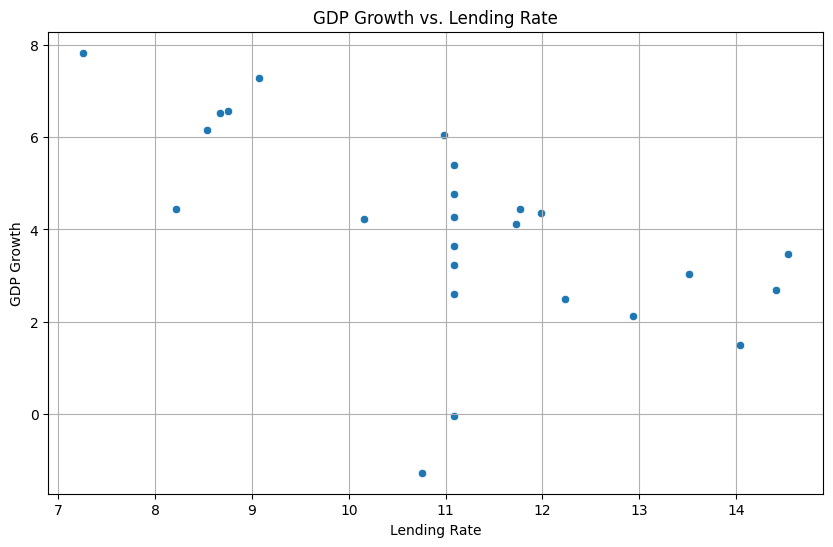

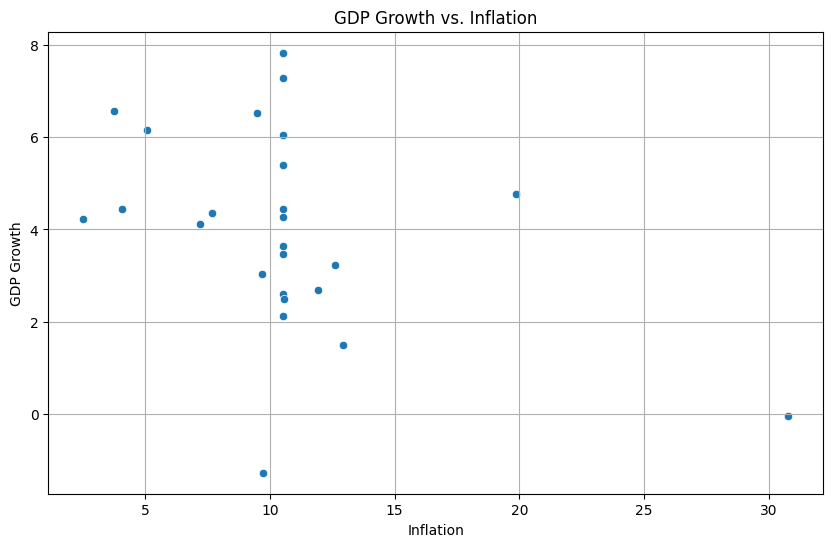

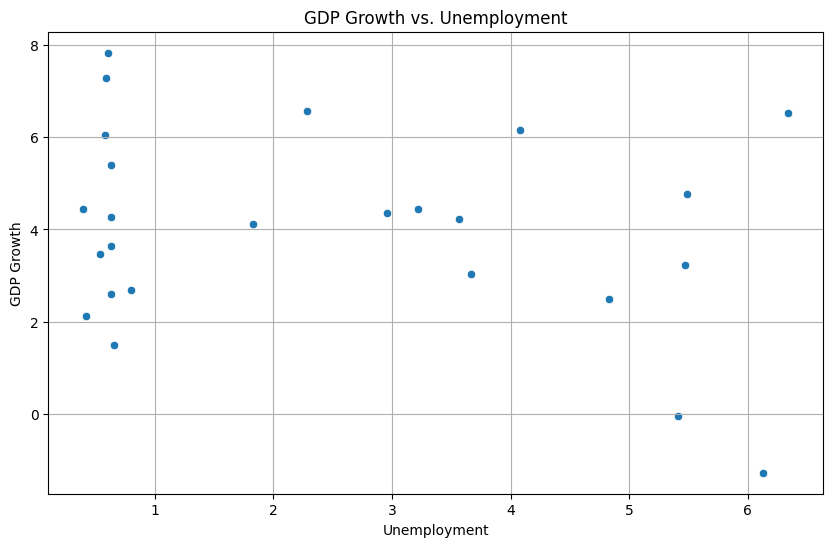

In [ ]:
#scatterplots to visualize the relationship between 'gdp_growth' and the identified top indicators ('lending_rate', 'inflation', and 'unemployment')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lending_rate', y='gdp_growth', data=t_df)
plt.xlabel('Lending Rate')
plt.ylabel('GDP Growth')
plt.title('GDP Growth vs. Lending Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='inflation', y='gdp_growth', data=t_df)
plt.xlabel('Inflation')
plt.ylabel('GDP Growth')
plt.title('GDP Growth vs. Inflation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='unemployment', y='gdp_growth', data=t_df)
plt.xlabel('Unemployment')
plt.ylabel('GDP Growth')
plt.title('GDP Growth vs. Unemployment')
plt.grid(True)
plt.show()

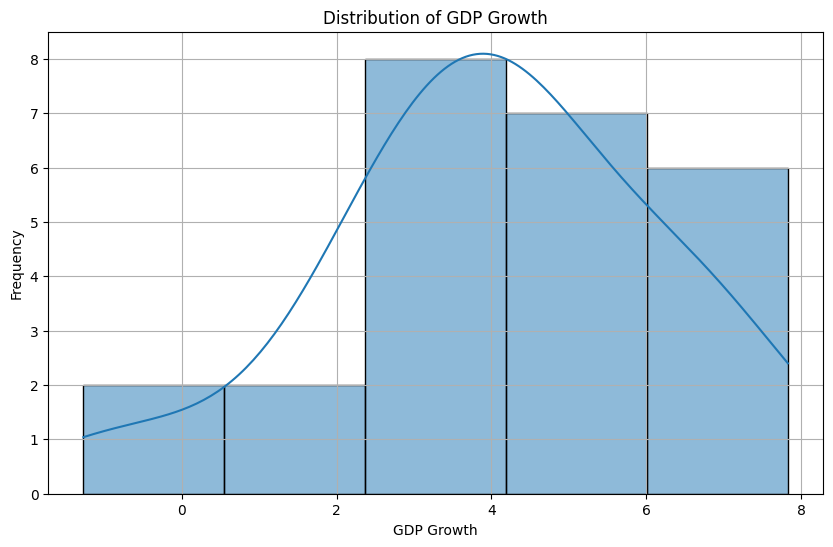

In [ ]:
# Histogram to show the distribution of 'gdp_growth'

plt.figure(figsize=(10, 6))
sns.histplot(t_df['gdp_growth'], kde=True, bins=5)
plt.xlabel('GDP Growth')
plt.ylabel('Frequency')
plt.title('Distribution of GDP Growth')
plt.grid(True)
plt.show()

### Data Analysis Key Findings
*   `lending_rate` shows a strong negative correlation of -0.589712 with `gdp_growth`, suggesting that higher lending rates are associated with lower GDP growth.
*   `inflation` has a moderate negative correlation of -0.413003 with `gdp_growth`, indicating that increasing inflation tends to coincide with decreasing GDP growth.
*   `unemployment` exhibits a weak negative correlation of -0.259369 with `gdp_growth`, implying that higher unemployment is generally linked to lower GDP growth.
*   `trade_balance`, `fdi_net`, and `pop_growth` show very weak positive correlations (0.144421, 0.081935, and 0.041294 respectively), suggesting their impact on GDP growth is less significant in this dataset.
*   The scatterplots visually confirm the negative relationships between `gdp_growth` and `lending_rate`, `inflation`, and `unemployment`.
*   A histogram with a Kernel Density Estimate (KDE) was generated, illustrating the distribution of `gdp_growth` values.

### Insights or Next Steps
*   The strong negative correlations of `lending_rate` and `inflation` with `gdp_growth` suggest these are critical macroeconomic factors influencing economic expansion. Further investigation into the causality and potential policy implications of these relationships could be beneficial.
*   The distribution of `gdp_growth` can be further analyzed to identify its central tendency, spread, and any skewness, which could inform expectations about economic performance.


# Train and testing (Random Forest and Ridge Regression)

In [ ]:
#Scaling

from sklearn.preprocessing import StandardScaler
num_cols = t_df.select_dtypes(include=['float','int']).columns.drop('gdp_growth')
scaler = StandardScaler()
t_df[num_cols] = scaler.fit_transform(t_df[num_cols])

In [ ]:
#Splitting data by year

t_df['year'] = t_df.index.str.replace('YR', '').astype(int)

train = t_df[t_df['year'] <= 2018]
test = t_df[(t_df['year'] >= 2019) & (t_df['year'] <= 2024)]

X_train = train.drop(columns=['gdp_growth', 'year'])
y_train = train['gdp_growth']

X_test = test.drop(columns=['gdp_growth', 'year'])
y_test = test['gdp_growth']

In [ ]:
# Model training (Random Forest)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: -0.3664817505506057
MAE: 2.3290700159426847
RMSE: 3.109367415166644


In [ ]:
# Model training (Ridge Regression)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print('R2:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R2: -0.8589127512291468
MAE: 2.6836237657289668
RMSE: 3.6265997581285006


In [ ]:
# Hyperparamter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5]
}

tscv = TimeSeriesSplit(n_splits=3)

rsearch = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=25,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

rsearch.fit(X_train, y_train)
print('Best parameters',rsearch.best_params_)
best_rf = rsearch.best_estimator_
print('Best estimator:', best_rf)

y_pred_rf = best_rf.predict(X_test)
print('\nPerformance of Best Random forest Model:')
print('R2:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimat

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Define the parameter distribution for Ridge Regression
param_dist_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 0.01, 0.001]
}

tscv = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV for Ridge Regression
ridge_rsearch = RandomizedSearchCV(
    Ridge(random_state=42),
    param_distributions=param_dist_ridge,
    n_iter=len(param_dist_ridge['alpha']),
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
ridge_rsearch.fit(X_train, y_train)

print('Best parameters for Ridge Regression:', ridge_rsearch.best_params_)
best_ridge = ridge_rsearch.best_estimator_
print('Best Ridge estimator:', best_ridge)

# Evaluate the best Ridge model on the test set
y_pred_ridge = best_ridge.predict(X_test)
print('\nPerformance of Best Ridge Model:')
print('R2:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................

#Visual Evaluation of the Model

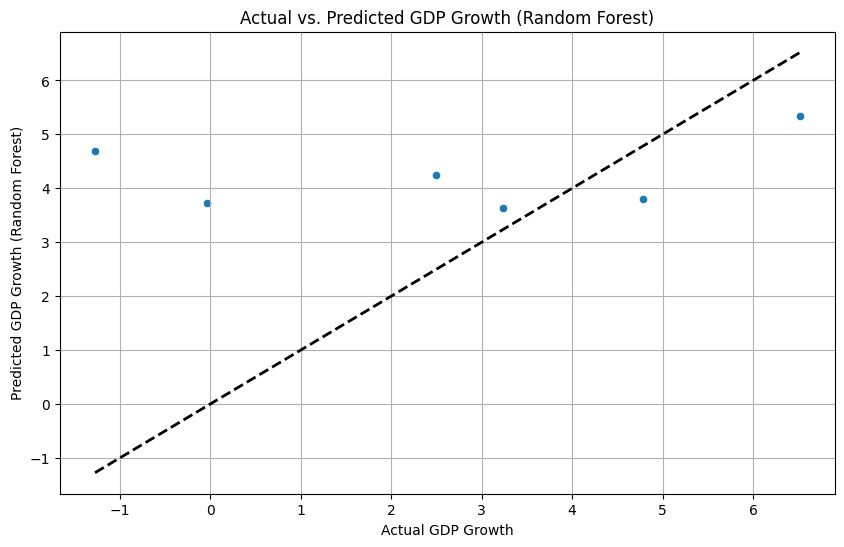

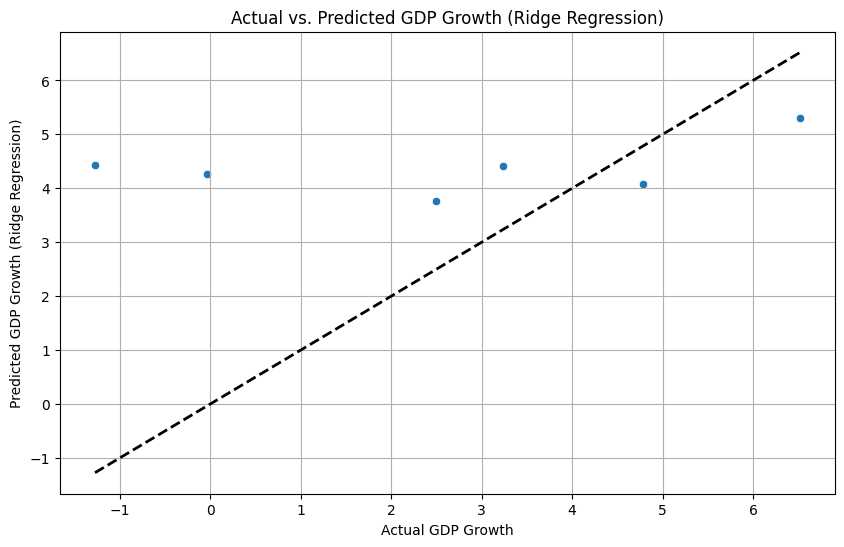

In [ ]:
# Actual vs Predicted for Best Random Forest Model

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP Growth')
plt.ylabel('Predicted GDP Growth (Random Forest)')
plt.title('Actual vs. Predicted GDP Growth (Random Forest)')
plt.grid(True)
plt.show()

# Actual vs Predicted for Best Ridge Regression Model

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP Growth')
plt.ylabel('Predicted GDP Growth (Ridge Regression)')
plt.title('Actual vs. Predicted GDP Growth (Ridge Regression)')
plt.grid(True)
plt.show()

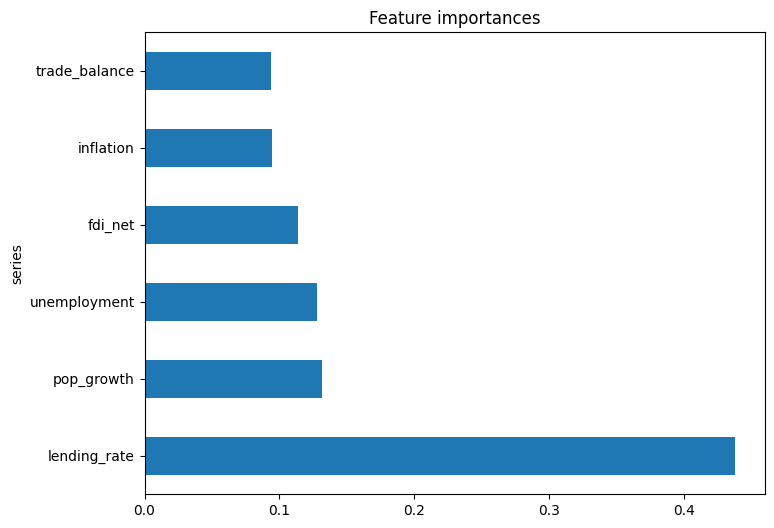

In [ ]:
# Feature importance

feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.title('Feature importances')
plt.show()
